# Time Series Final Project
- Christabelle Pabalan
- Shruti Roy 
- Sicheng Zhou 

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import arma_order_select_ic

from utils import *

## 1. Exploratory Data Analysis

In [4]:
sep_date = '2015-12-31'
main_col = 'MedianSoldPrice_AllHomes.California'

In [5]:
# # purity train data, only keeping data before sep_date, after which is test data
# df_train = pd.read_csv("data/zillow-california.csv", index_col=["Date"], parse_dates=["Date"])[:sep_date]
# df_train.to_csv("data/df_train_multi_cols.csv", index=True)
# df_train_one_col = df_train[main_col]
# df_train_one_col.to_csv("data/df_train_one_col.csv", index=True)

In [6]:
df_train_one_col = pd.read_csv("data/df_train_one_col.csv", index_col=["Date"], parse_dates=["Date"])
data = df_train_one_col[main_col].values

### 1.1 Time Series Plot

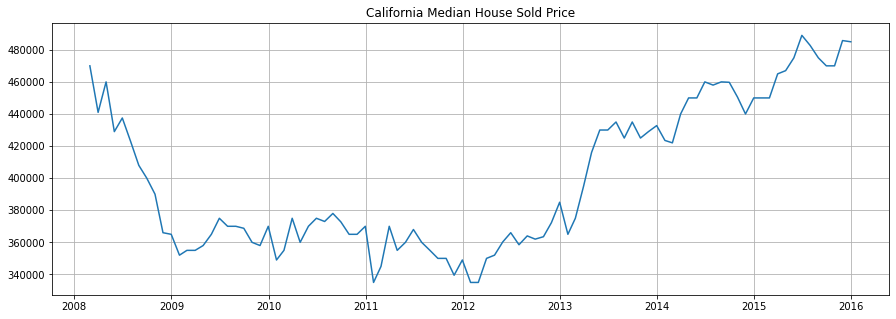

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df_train_one_col)
ax.set_title("California Median House Sold Price")
ax.grid()
plt.show()

- From time series plot, we could see that the median sold price keeps dropping since 2008 until it reaches the lowest point near 2012. Then the median sold price keeps going up.

### 1.1 Time Series Plot with Smoothing

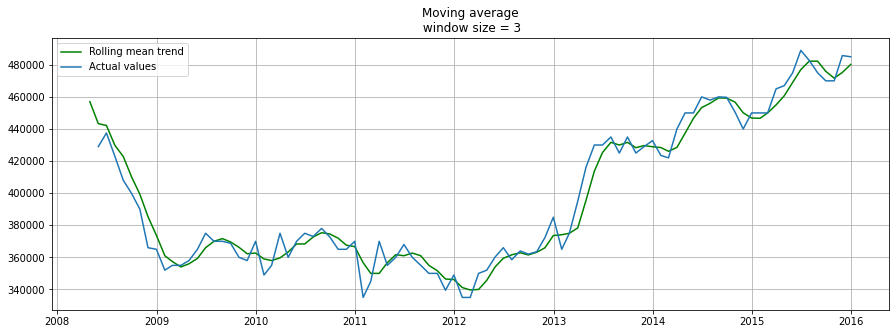

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 3, ax=ax, plot_actual=True) 
plt.show()

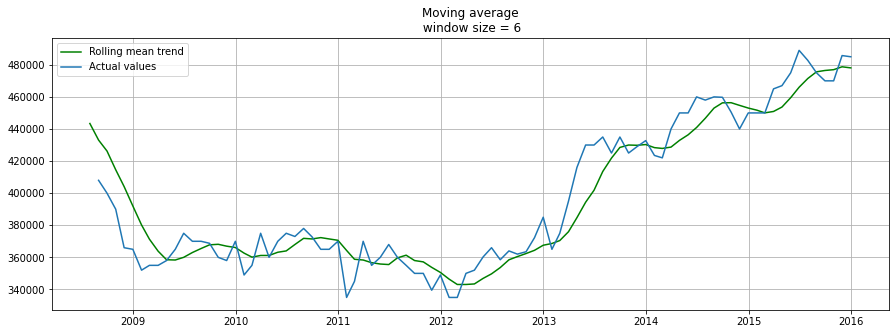

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 6, ax=ax, plot_actual=True) 
plt.show()

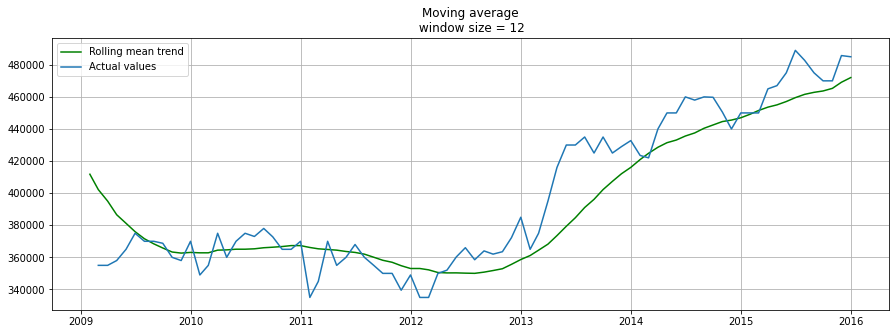

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
plot_moving_average(df_train_one_col, 12, ax=ax, plot_actual=True) 
plt.show()

### 1.1 ACF Plot

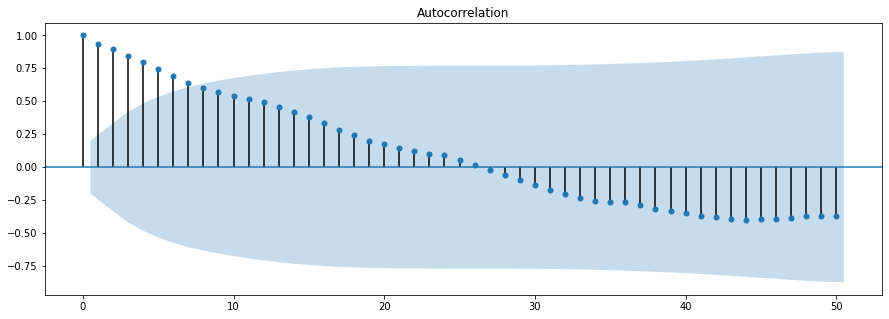

In [9]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plot_acf(data, lags=50, ax=ax)
plt.show()

- From ACF Plot we could see that the data has good trending.

### 1.1 PACF Plot

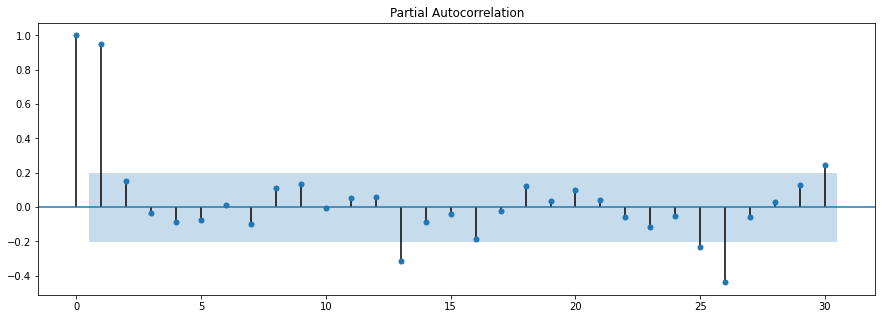

In [10]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
plot_pacf(data, lags=30, ax=ax)
plt.show()

- The PACF Plot shuts-off around lag=3, it might be an AR process with p=3

## 2. Train Different Models

- First, we need to split the data into train and validation

In [7]:
df_train, df_val, _ = train_val_test_split(df_train_one_col, train_rate=0.8, val_rate=0.2, shuffle=False)

In [8]:
df_train.to_csv("data/df_train_one_col_split.csv")

In [12]:
df_train_data = df_train[main_col].values
df_val_data = df_val[main_col].values

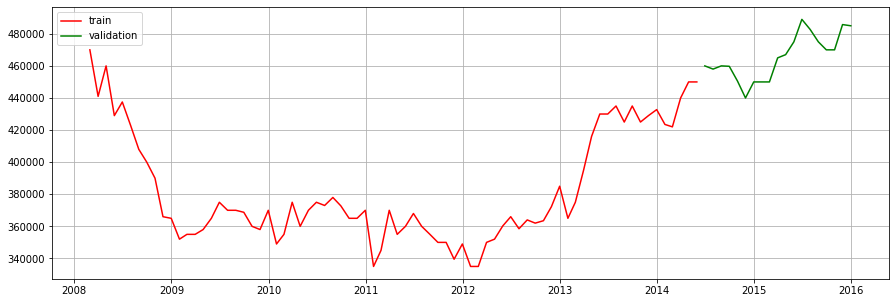

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
plot_train_val_test(df_train, df_val, df_test=None, ax=ax)
ax.grid()
plt.show()

### 2.1 SARIMA

#### 2.1.1 Detrend the data

We detrend this data, after each detrend we perform an Adfuller test to see if the data is stationary. We select threshold p value as 0.05.

In [58]:
d, data_dtrend = min_diff_times(df_train_data, lag=1, p_value=0.05)

Difference data 0 times, p value = 0.9240387519337854
Difference data 1 times, p value = 0.09269067697688355
Difference data 2 times, p value = 3.9659294982321406e-08


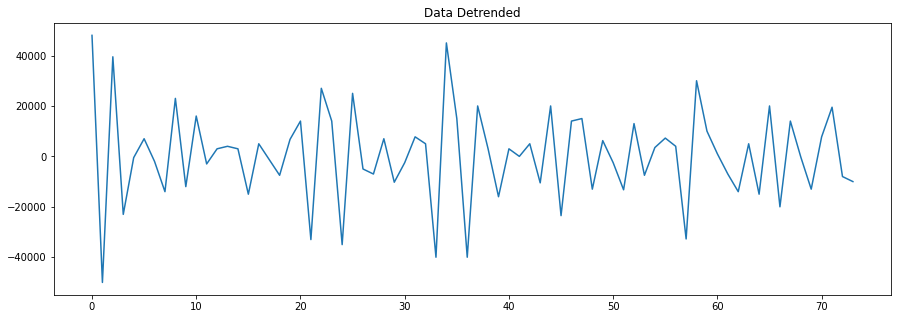

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data_dtrend)
ax.set_title("Data Detrended")
plt.show()

From the calculation above, we decide to choose d=2 in SARIMA model

In [102]:
D, data_dtrend_m = min_diff_times(df_train_data, lag=10, p_value=0.05)

Difference data 0 times, p value = 0.9240387519337854
Difference data 1 times, p value = 0.549121561480943
Difference data 2 times, p value = 0.551644856210962
Difference data 3 times, p value = 0.936405714194394
Difference data 4 times, p value = 0.9983643905129642
Difference data 5 times, p value = 0.9989302997167488
Difference data 6 times, p value = 0.12562427861971615
Difference data 7 times, p value = 0.0


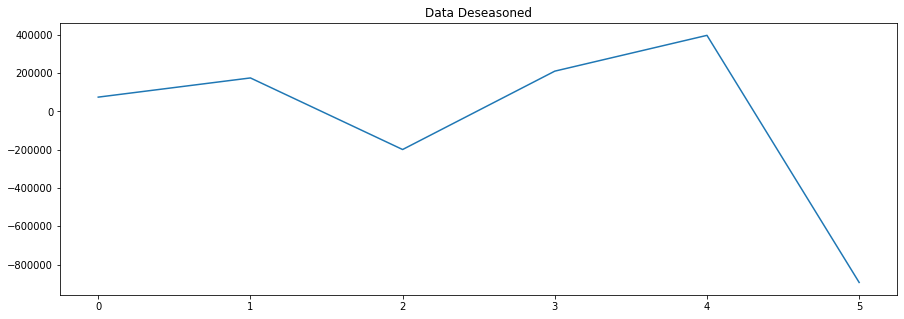

In [103]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data_dtrend_m)
ax.set_title("Data Deseasoned")
plt.show()

#### 2.1.1 SARIMA using AIC

In [18]:
res_aic = arma_order_select_ic(data_dtrend, max_ar=3, max_ma=7, ic='aic')

{'aic':              0            1            2            3            4  \
 0  1668.692522  1607.314452  1604.023934  1604.460032  1604.320915   
 1  1637.764861  1603.722275  1609.734024  1608.025829  1605.911590   
 2  1613.262449  1605.415884  1606.454910  1602.143266  1602.910486   
 3  1612.115986  1614.030647  1605.482851          NaN          NaN   
 
              5            6            7  
 0  1605.267175  1609.841597  1611.816200  
 1  1607.036443  1606.348978  1608.299169  
 2  1606.257483  1611.826729  1610.393361  
 3  1604.932686  1608.861720  1604.715023  ,
 'aic_min_order': (2, 3)}

#### 2.1.1 SARIMA using BIC

In [20]:
arma_order_select_ic(data_dtrend, max_ar=3, max_ma=7, ic='bic')

{'bic':              0            1            2            3            4  \
 0  1673.300652  1614.226647  1613.240194  1615.980357  1618.145305   
 1  1644.677056  1612.938536  1621.254349  1621.850219  1622.040046   
 2  1622.478709  1616.936210  1620.279300  1618.271722  1621.343007   
 3  1623.636311  1627.855037  1621.611306          NaN          NaN   
 
              5            6            7  
 0  1621.395630  1628.274118  1632.552786  
 1  1625.468964  1627.085564  1631.339820  
 2  1626.994068  1634.867380  1635.738077  
 3  1627.973337  1634.206436  1632.363804  ,
 'bic_min_order': (1, 1)}

#### 2.1.1 SARIMA using RMSE

#### 2.1.1 SARIMA using MAE

### 2.1 SARIMAX

### 2.1 Other Models That will be covered

### 2.1 Facebook Prophet

## 3. Model Selection

## 4. Forcasting on test data

## 5. Conclusion

## 6. Proportion of Work

| name | Christabelle Pabalan | Shruti Roy | Sicheng Zhou |
|-------|--------|--------|--------|
| Peer Review      |        |       |        |